In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Leitura dos dados

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

### Verificar dados nulos

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Informações estatísticas

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Gerando gráfico da idade versus score do cliente

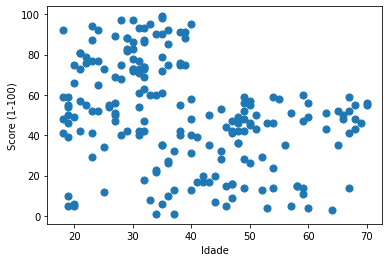

In [6]:
plt.scatter(df['Age'], df['Spending Score (1-100)'], s=50)
plt.xlabel('Idade')
plt.ylabel('Score (1-100)')
plt.show()

### Agora é sua vez de praticar

selecione os dados de 'Age' e 'Spending Score (1-100)' no dataframe para realizar o agrupamento com kmeans

In [7]:
# selecione no dataframe df as colunas Age e Spending Score (1-100)
X = df[['Age', 'Spending Score (1-100)']]
X.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


### Clusterizando com k = 5

In [8]:
modelo_kmeans = KMeans(n_clusters= 5, init='k-means++')
y_kmeans= modelo_kmeans.fit_predict(X)
print(y_kmeans)

[0 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 1 0 1 2 1 2 3 2 3 2 1 0 1 2 3 2 3 2 3 2 3
 2 1 2 4 2 1 0 1 0 4 0 1 1 4 0 0 4 4 1 4 4 0 4 4 0 4 4 4 0 1 4 0 0 4 1 4 4
 4 0 4 1 0 1 4 0 4 1 0 4 4 0 0 4 4 0 4 1 1 0 4 0 1 0 0 4 4 0 4 0 4 4 4 4 4
 0 1 0 0 0 4 4 4 4 0 1 0 2 1 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 1 2
 3 2 3 2 3 2 3 2 3 2 3 2 4 2 3 2 1 2 3 2 1 0 3 2 3 2 3 2 3 2 3 2 1 2 3 2 1
 2 3 0 3 2 1 2 3 2 3 2 1 2 3 2]


### Plot um gráfico com todos os grupos

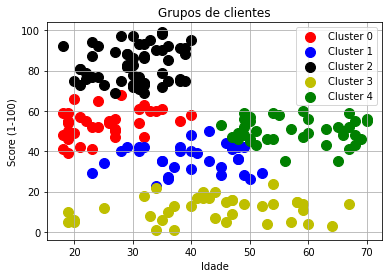

<Figure size 432x288 with 0 Axes>

In [9]:
# escreva aqui o código para plotar o gráfico
k_grupos = 5
cores = ['r', 'b', 'k', 'y', 'g']
for k in range(k_grupos):
    cluster = X[y_kmeans == k]
    plt.scatter(cluster['Age'], cluster['Spending Score (1-100)'],
                s = 100, c = cores[k], label = f'Cluster {k}')


plt.title('Grupos de clientes')
plt.xlabel('Idade')
plt.ylabel('Score (1-100)')
plt.grid()
plt.legend()
plt.show()
plt.savefig('Gráfico de grupo de clientes.png')

In [10]:
#exportando dados
resultado = open('resultado.txt', 'w')
resultado.write(str(y_kmeans))
resultado.close()